<a href="https://colab.research.google.com/github/Anael13/Data-science/blob/master/AI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
 max([max(sequence) for sequence in train_data])

9999

In [5]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 # Create an all-zero matrix of shape (len(sequences), dimension)
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1. # set specific indices of results[i] to 1s
  return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
from keras import optimizers

model.compile(optimizer="rmsprop",loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
from keras import losses
from keras import metrics
model.compile(optimizer="rmsprop",loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 49ms/step - loss: 0.6932 - binary_accuracy: 0.5009 - val_loss: 0.6932 - val_binary_accuracy: 0.4947
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4947
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4947
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4947
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6933 - val_binary_accuracy: 0.4947
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4947
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - los

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

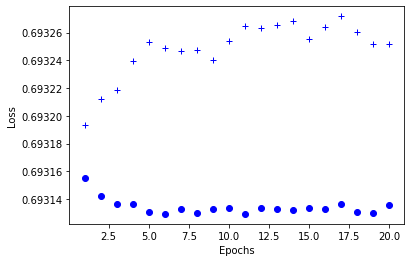

In [17]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
plt.clf() # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.6932 - accuracy: 0.4989
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.6932 - accuracy: 0.4989
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.6932 - accuracy: 0.4973
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5000


In [19]:
results

[0.6931502223014832, 0.4999600052833557]

In [20]:
model.predict(x_test)

array([[0.5161791 ],
       [0.49993828],
       [0.49993828],
       ...,
       [0.49993828],
       [0.49993828],
       [0.49993828]], dtype=float32)

In [21]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [22]:
len(train_data)

8982

In [23]:
len(test_data)

2246

In [24]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [25]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [26]:
train_labels[10]

3

In [30]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [32]:
def to_one_hot(labels, dimension=46):
 results = np.zeros((len(labels), dimension))
 for i, label in enumerate(labels):
  results[i, label] = 1.
  return results
# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [33]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [34]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [35]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [37]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 59ms/step - loss: 3.8117 - accuracy: 0.1473 - val_loss: 3.7978 - val_accuracy: 0.0590
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 3.7879 - accuracy: 0.1094 - val_loss: 3.7769 - val_accuracy: 0.2220
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 3.7674 - accuracy: 0.2164 - val_loss: 3.7569 - val_accuracy: 0.2220
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 3.7475 - accuracy: 0.2164 - val_loss: 3.7372 - val_accuracy: 0.2220
Epoch 5/20
16/16 [==============================] - 1s 50ms/step - loss: 3.7279 - accuracy: 0.2164 - val_loss: 3.7176 - val_accuracy: 0.2220
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 3.7083 - accuracy: 0.2164 - val_loss: 3.6982 - val_accuracy: 0.2220
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 3.6888 - accuracy: 0.2164 - val_loss: 3.6789 - val_accuracy: 0.2220
Epoch 8/20
16

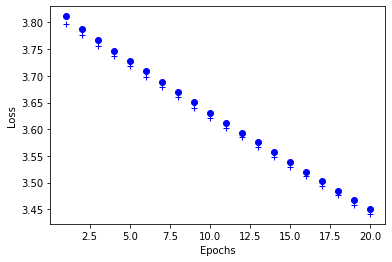

In [38]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

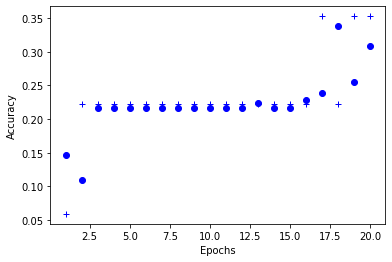

Epoch 1/9
18/18 [==============================] - 2s 72ms/step - loss: 3.8075 - accuracy: 0.1613 - val_loss: 3.7692 - val_accuracy: 0.3540
Epoch 2/9
18/18 [==============================] - 1s 50ms/step - loss: 3.7129 - accuracy: 0.3517 - val_loss: 3.6354 - val_accuracy: 0.3540
Epoch 3/9
18/18 [==============================] - 1s 49ms/step - loss: 3.5528 - accuracy: 0.3517 - val_loss: 3.4431 - val_accuracy: 0.3540
Epoch 4/9
18/18 [==============================] - 1s 50ms/step - loss: 3.3350 - accuracy: 0.3517 - val_loss: 3.1956 - val_accuracy: 0.3540
Epoch 5/9
18/18 [==============================] - 1s 49ms/step - loss: 3.0696 - accuracy: 0.3517 - val_loss: 2.9148 - val_accuracy: 0.3540
Epoch 6/9
18/18 [==============================] - 1s 48ms/step - loss: 2.7942 - accuracy: 0.3517 - val_loss: 2.6558 - val_accuracy: 0.3540
Epoch 7/9
18/18 [==============================] - 1s 49ms/step - loss: 2.5726 - accuracy: 0.3517 - val_loss: 2.4821 - val_accuracy: 0.3540
Epoch 8/9
18/18 [===

In [42]:
plt.clf() # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])
model.fit(x_train,
 one_hot_train_labels,
 epochs=9,
 batch_size=512,
 validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

In [43]:
results

[2.4238014221191406, 0.36197686195373535]

In [44]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18833481745325023

In [45]:
predictions = model.predict(x_test)

In [46]:
predictions[0].shape

(46,)

In [47]:
np.sum(predictions[0])

0.99999994

In [48]:
np.argmax(predictions[0])

3

In [49]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

NameError: ignored

In [50]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [51]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,one_hot_train_labels,epochs=10,batch_size=128,validation_data=(x_test, one_hot_test_labels))

Epoch 1/10
71/71 [==============================] - 2s 22ms/step - loss: 3.7767 - accuracy: 0.2384 - val_loss: 3.7320 - val_accuracy: 0.0592
Epoch 2/10
71/71 [==============================] - 1s 18ms/step - loss: 3.6786 - accuracy: 0.0611 - val_loss: 3.6217 - val_accuracy: 0.0592
Epoch 3/10
71/71 [==============================] - 1s 18ms/step - loss: 3.5472 - accuracy: 0.0611 - val_loss: 3.4712 - val_accuracy: 0.0592
Epoch 4/10
71/71 [==============================] - 1s 19ms/step - loss: 3.3727 - accuracy: 0.0611 - val_loss: 3.2795 - val_accuracy: 0.0592
Epoch 5/10
71/71 [==============================] - 1s 18ms/step - loss: 3.1605 - accuracy: 0.1561 - val_loss: 3.0532 - val_accuracy: 0.2110
Epoch 6/10
71/71 [==============================] - 1s 18ms/step - loss: 2.9230 - accuracy: 0.2170 - val_loss: 2.8169 - val_accuracy: 0.2110
Epoch 7/10
71/71 [==============================] - 1s 18ms/step - loss: 2.6950 - accuracy: 0.2170 - val_loss: 2.6135 - val_accuracy: 0.2110
Epoch 8/10
71

In [52]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [53]:
train_data.shape

(404, 13)

In [54]:
test_data.shape

(102, 13)

In [55]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [56]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [57]:
from keras import models
from keras import layers
def build_model():
 # Because we will need to instantiate
 # the same model multiple time,
 # we use a function to construct it.
 model = models.Sequential()
 model.add(layers.Dense(64, activation='relu',
 input_shape=(train_data.shape[1],)))
 model.add(layers.Dense(64, activation='relu'))
 model.add(layers.Dense(1))
 model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
 return model

In [58]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
 print('processing fold #', i)
 # Prepare the validation data: data from partition # k
 val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
 val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
 # Prepare the training data: data from all other partitions
 partial_train_data = np.concatenate(
 [train_data[:i * num_val_samples],
 train_data[(i + 1) * num_val_samples:]],
 axis=0)
 partial_train_targets = np.concatenate(
 [train_targets[:i * num_val_samples],
 train_targets[(i + 1) * num_val_samples:]],
 axis=0)
 # Build the Keras model (already compiled)
 model = build_model()
 # Train the model (in silent mode, verbose=0)
 model.fit(partial_train_data, partial_train_targets,
 epochs=num_epochs, batch_size=1, verbose=0)
 # Evaluate the model on the validation data
 val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
 all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [59]:
all_scores

[2.0265953540802, 2.070777416229248, 2.5908963680267334, 2.5647199153900146]

In [60]:
np.mean(all_scores)

2.313247263431549

In [61]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
 print('processing fold #', i)
 # Prepare the validation data: data from partition # k
 val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
 val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
 # Prepare the training data: data from all other partitions
 partial_train_data = np.concatenate(
 [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
 partial_train_targets = np.concatenate(
 [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
 # Build the Keras model (already compiled)
 model = build_model()
 # Train the model (in silent mode, verbose=0)
 history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0)
 mae_history = history.history['val_mean_absolute_error']
 all_mae_histories.append(mae_history)

processing fold # 0


KeyboardInterrupt: ignored

In [ ]:
average_mae_history = [
 np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs))]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(average_mae_history)), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
plt.plot(range(len(average_mae_history) - 10), average_mae_history[10:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
 epochs=150, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score